In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
np.random.seed(seed=1)

In [2]:
#Parameters
n = 100 # Number of rows
Lambda = 0 # Regularisation parameter
alpha = 1 # Noise variance
sigma = 1 # Theta's variance

In [3]:
ratio_dim = np.linspace(0.1,6,80)
ratios_final = [] # List of the ratios n/p 
Equivalent_risk_const = [] # List of deterministic equivalent for various ratios p/n in the case of a Constant Variance profile
Equivalent_risk_db_sto = [] # List of deterministic equivalent for various ratios p/n in the case of a Bi-Stochastic Variance profile


Risk_const = [] # List of predictive risk for various ratios p/n in the case of a Constant Variance profile
Risk_db_sto = [] # List of predictive risk for various ratios p/n in the case of a Bi-Stochastic Variance profile

for r in ratio_dim:
  p = int(n*r) # Number of columns

  #Choice of the Variance profile
  Gamma_const = utils.variance_profile('constant', n, p, const = 1) # Constant Variance profile for the training set
  Gamma_db_sto = utils.variance_profile('doubly_stochastic', n, p, K = 1000) # Quasi Bi-Stochastic Variance profile for the training set

  Gamma_const_test = utils.variance_profile('constant', 1, p, const = 1) # Constant Variance profile for the test set
  Gamma_db_sto_test = utils.variance_profile('doubly_stochastic', 1, p, K = 1000) # Quasi Bi-Stochastic Variance profile for the test set

  if p != n: # If n=p the predictive risk is not defined, thus we avoid this situation
    ratios_final.append(r)
    risk_const, equivalent_risk_const, _ = utils.R_ts(Lambda, Gamma_const, Gamma_const_test, n, p, alpha = alpha, sig = sigma) # Predictive risk and Deterministic equivalent for the Constant Variance profile
    risk_db_sto, equivalent_risk_db_sto, _ = utils.R_ts(Lambda, Gamma_db_sto, Gamma_db_sto_test, n, p, alpha = alpha, sig = sigma) # Predictive risk and Deterministic equivalent for the Quasi Bi-Stochastic Variance profile

    Equivalent_risk_const.append(equivalent_risk_const)
    Equivalent_risk_db_sto.append(equivalent_risk_db_sto)
    
    Risk_const.append(risk_const)
    Risk_db_sto.append(risk_db_sto)

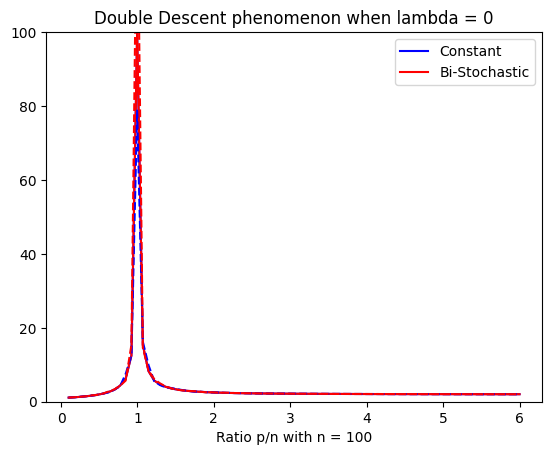

In [7]:
fig, ax = plt.subplots()
ax.plot(ratios_final, Equivalent_risk_const, color = 'blue')
ax.plot(ratios_final, Equivalent_risk_db_sto, color = 'red')

ax.plot(ratios_final, Risk_const, '--', color = 'blue')
ax.plot(ratios_final, Risk_db_sto, '--', color = 'red')

plt.legend(["Constant", "Bi-Stochastic"])
plt.xlabel("Ratio p/n with n = 100")
plt.title("Double Descent phenomenon when lambda = 0")
plt.ylim(0,100)
plt.show()

In [5]:
n = 300 # Number of rows

ratio_dim = np.linspace(0.1,6,50) # Ratios p/n
eig_const = [] # List of Smallest non-zero eigenvalue of the covariance matrix for various ratios p/n in the case of the Constant Variance profile
eig_db_sto = [] # List of Smallest non-zero eigenvalue of the covariance matrix for various ratios p/n in the case of the Bi-stochastic Variance profile

for r in ratio_dim:
  p = int(n*r) # Number of columns
  print(p)
  Gamma_const = utils.variance_profile('constant', n, p, const = 1) # Constant Variance profile
  X_const = np.sqrt(Gamma_const) * np.random.normal(0,1,size = (n,p)) # Data matrix with a Constant Variance profile
  eig_const.append(max(np.real(np.min(np.linalg.eigvals((X_const @ X_const.T)/n))), np.real(np.min(np.linalg.eigvals(X_const.T @ X_const/n)))))
    
  Gamma_db_sto = utils.variance_profile('doubly_stochastic', n, p, K = 1000) # Quasi Bi-Stochastic Variance profile
  X_db_sto = np.sqrt(Gamma_db_sto) * np.random.normal(0,1,size = (n,p)) # Data matrix with a Bi-Stochastic Variance profile
  eig_db_sto.append(max(np.real(np.min(np.linalg.eigvals((X_db_sto @ X_db_sto.T)/n))), np.real(np.min(np.linalg.eigvals(X_db_sto.T @ X_db_sto/n)))))

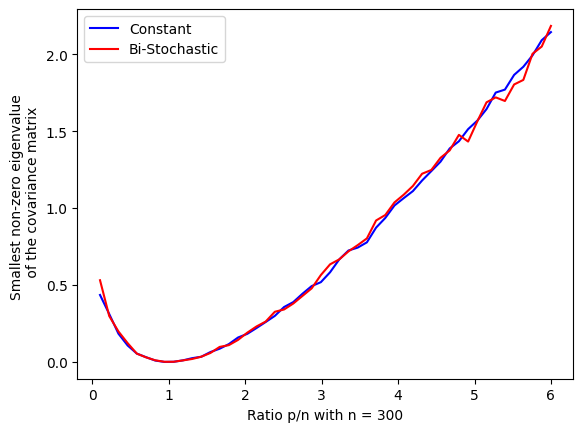

In [6]:
plt.plot(ratio_dim,eig_const, color = 'blue')
plt.plot(ratio_dim,eig_db_sto, color = 'red')
plt.xlabel("Ratio p/n with n = 300")
plt.ylabel("Smallest non-zero eigenvalue \n of the covariance matrix")
plt.legend(["Constant", "Bi-Stochastic"])